In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor
from sklearn import metrics

# Data Collection And Analysis

In [2]:
market = pd.read_csv("Train.csv")

In [3]:
market

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [4]:
#print first 5 rows of the dataframe
market.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
#print last 5 rows of the dataframe
market.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [6]:
#check the number of data points and number of features
market.shape

#8523 :  rows
#12   : columns

(8523, 12)

In [7]:
#getting some information about the dataset
market.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [15]:
#check the missing values of the dataset
market.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

### Handling Missing Values 

1. Mean/Median Imputation  (for numerical data) 
2. Mode Imputation - Most frequently values in the dataset (for categorical data)

In [16]:
# Mean value of "Item weight" column
market['Item_Weight'].mean()

#filling the missing values in "Item_weight" column with "Mean" value
market['Item_Weight'].fillna(market['Item_Weight'].mean(), inplace = True)


In [17]:
#Replaceing the missing values in "Outlet_size" with mode
market['Outlet_Size'].mode()

0    Medium
dtype: object

In [23]:
# filling the missing values in "Outlet_Size" column with Mode

# pivot_table: This function is used to create a pivot table that summarizes data based on specified values, rows, columns, and aggregation functions.
#The use of pivot_table in code is a strategy to compute the mode of the "Outlet_Size" for each "Outlet_Type" in your dataset
#(lambda x: x.mode()[0]) computes the mode (most frequent value) of "Outlet_Size" for each "Outlet_Type"
#0 represents the index

mode_of_Outlet_size = market.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))

print(mode_of_Outlet_size)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


In [24]:
miss_values = market['Outlet_Size'].isnull() 
miss_values

#True represent : missing value
#False represent : Value is not missing

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool

In [25]:
market.loc[miss_values, 'Outlet_Size'] = market.loc[miss_values,'Outlet_Type'].apply(lambda x: mode_of_Outlet_size[x])

In [26]:
#Checking for missing Values
market.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

Categorical Features

1. Item_Identifier   
2. Item_Fat_Content
3. Item_Type 
4. Outlet_Identifier  
5. Outlet_Size               
6. Outlet_Location_Type       
7. Outlet_Type

# Data Analysis

In [27]:
#statistical measures about the data
market.describe()

#25 percentile less than mean
#as same as all

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


### Numerical Features

In [28]:
sns.set()

C:\Users\suyash\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


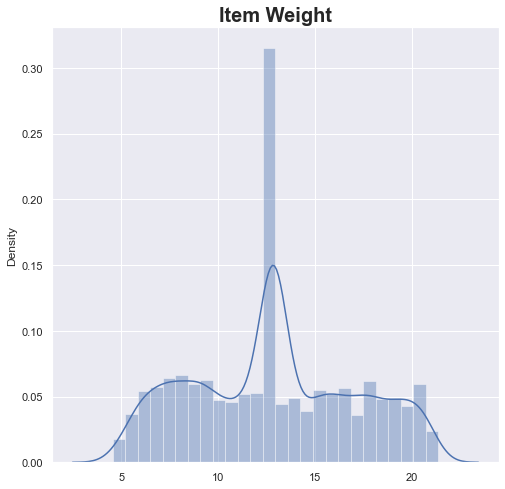

In [29]:
#Item Weight Distribution

plt.figure(figsize = (8,8))
sns.distplot(x = market['Item_Weight'])
plt.title("Item Weight", fontweight = "bold", fontsize = 20)
plt.show()

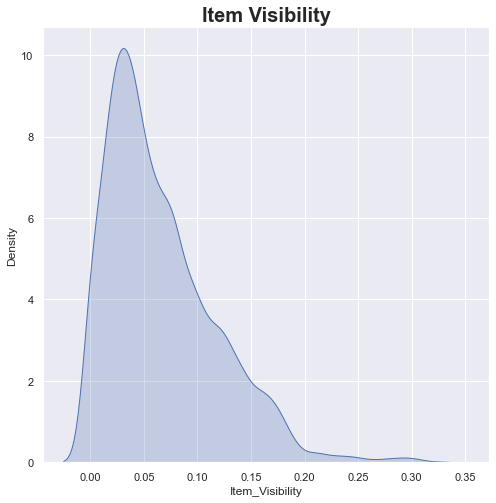

In [30]:
#Item Visibility Distribution

plt.figure(figsize = (8,8))

sns.kdeplot(data=market, x='Item_Visibility', shade=True)
plt.title("Item Visibility", fontweight = "bold", fontsize = 20)
plt.show()

C:\Users\suyash\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


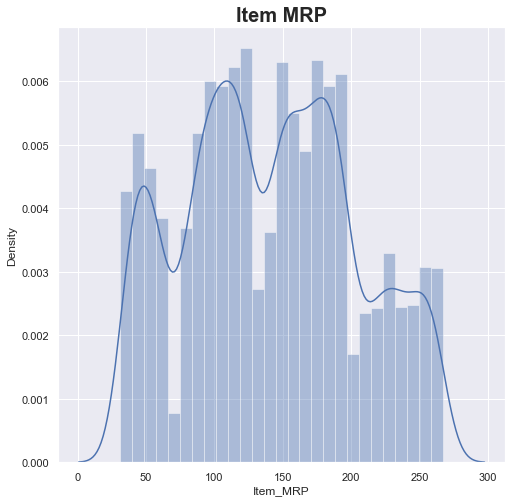

In [31]:
#Item MRP Distribution

plt.figure(figsize = (8,8))
sns.distplot(market['Item_MRP'])
plt.title("Item MRP", fontweight = "bold", fontsize = 20)
plt.show()

C:\Users\suyash\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


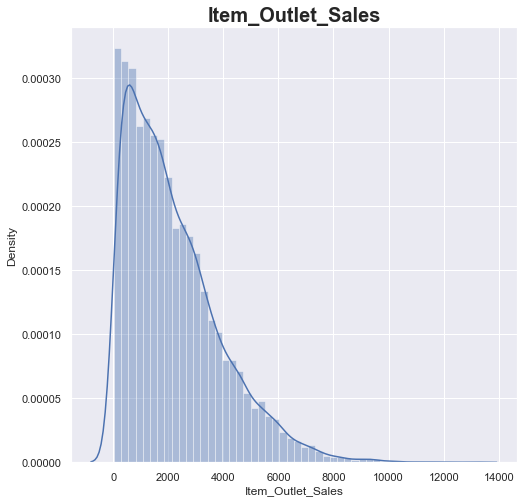

In [32]:
#Item_Outlet_Sales Distribution


plt.figure(figsize = (8,8))
sns.distplot(market['Item_Outlet_Sales'])
plt.title("Item_Outlet_Sales", fontweight = "bold", fontsize = 20)
plt.show()

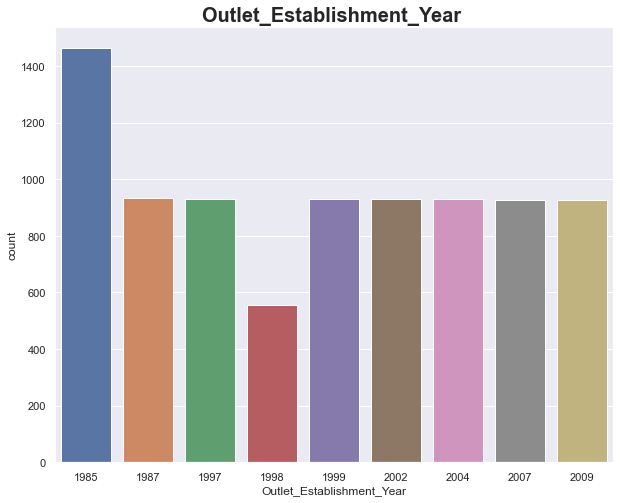

In [33]:
#Outlet_Establishment_Year Count

plt.figure(figsize = (10,8))
sns.countplot(x= 'Outlet_Establishment_Year', data = market)
plt.title("Outlet_Establishment_Year ", fontweight = "bold", fontsize = 20)
plt.show()

### Categorical Features 

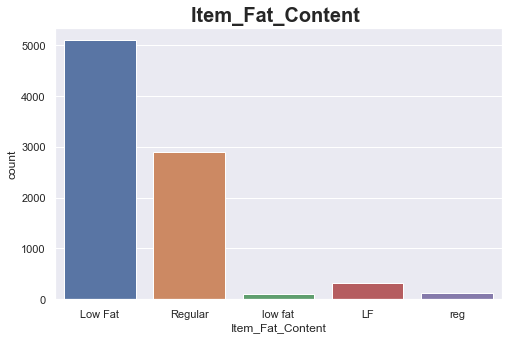

In [34]:
#Item_Fat_Content Count

plt.figure(figsize = (8,5))
sns.countplot(x= 'Item_Fat_Content', data = market)
plt.title("Item_Fat_Content ", fontweight = "bold", fontsize = 20)
plt.show()

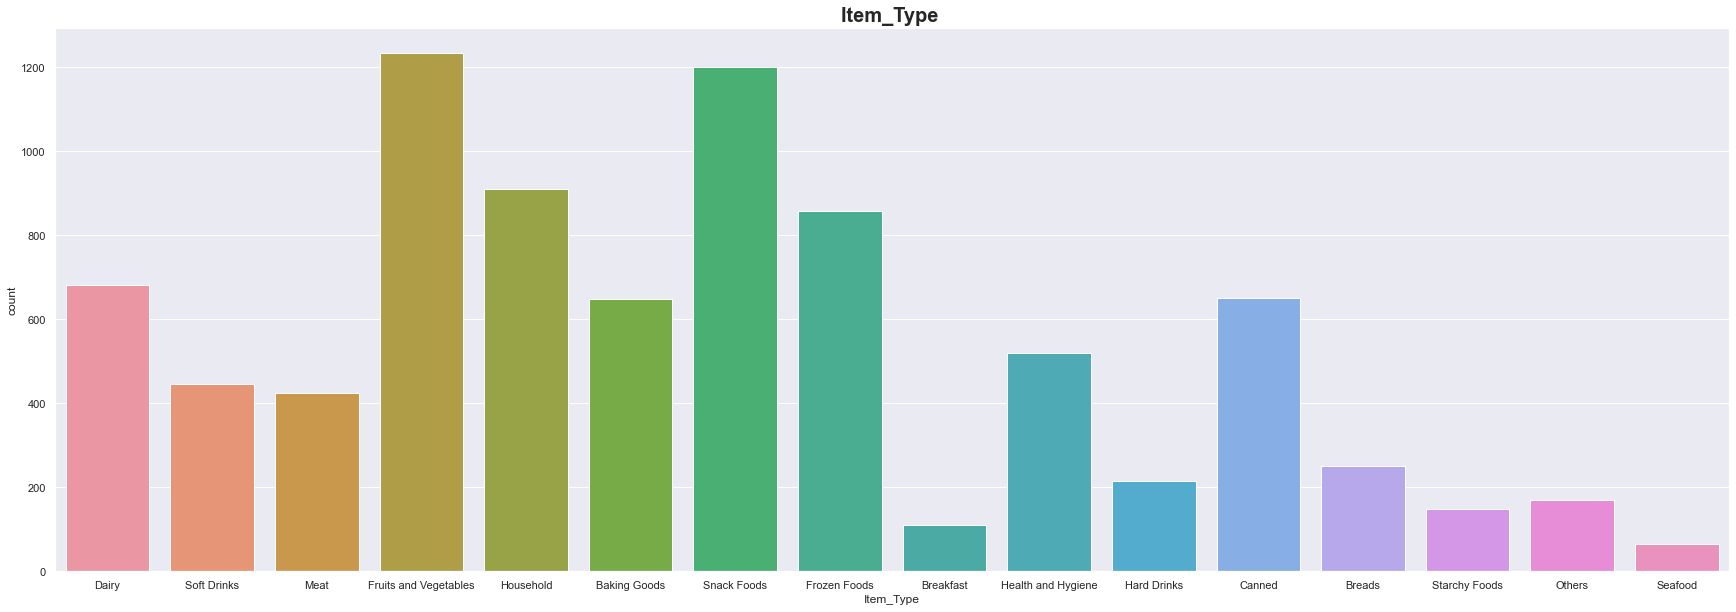

In [35]:
#Item_Type Count

plt.figure(figsize = (30,10))
sns.countplot(x= 'Item_Type', data = market)
plt.title("Item_Type ", fontweight = "bold", fontsize = 20)
plt.show()

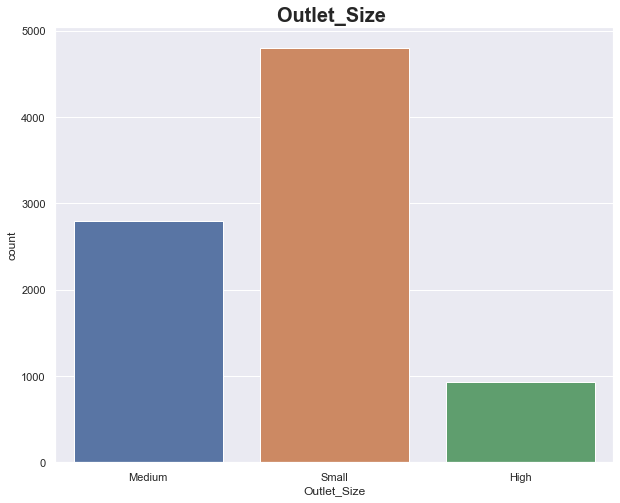

In [36]:
#Outlet_size Count

plt.figure(figsize = (10,8))
sns.countplot(x= 'Outlet_Size', data = market)
plt.title("Outlet_Size ", fontweight = "bold", fontsize = 20)
plt.show()

# Data Preprocessing

In [37]:
market.head(20)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300000,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920000,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500000,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200000,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.930000,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395000,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650000,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,12.857645,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200000,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Small,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200000,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,Small,Tier 2,Supermarket Type1,4710.5350


In [38]:
market['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [39]:
market.replace({'Item_Fat_Content': {'low fat':'Low Fat','LF':'Low Fat', 'reg':'Regular'}}, inplace=True)

In [40]:
market['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

#### Label Encoding

In [41]:
encoder = LabelEncoder()

In [42]:
market['Item_Identifier'] = encoder.fit_transform(market['Item_Identifier'])

market['Item_Fat_Content'] = encoder.fit_transform(market['Item_Fat_Content'])

market['Item_Type'] = encoder.fit_transform(market['Item_Type'])

market['Outlet_Identifier'] = encoder.fit_transform(market['Outlet_Identifier'])

market['Outlet_Size'] = encoder.fit_transform(market['Outlet_Size'])

market['Outlet_Location_Type'] = encoder.fit_transform(market['Outlet_Location_Type'])

market['Outlet_Type'] = encoder.fit_transform(market['Outlet_Type'])


In [43]:
market.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


# Splitting Features and Target

In [44]:
X = market.iloc[:, :-1]
X

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,156,9.300,0,0.016047,4,249.8092,9,1999,1,0,1
1,8,5.920,1,0.019278,14,48.2692,3,2009,1,2,2
2,662,17.500,0,0.016760,10,141.6180,9,1999,1,0,1
3,1121,19.200,1,0.000000,6,182.0950,0,1998,2,2,0
4,1297,8.930,0,0.000000,9,53.8614,1,1987,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,0,0.056783,13,214.5218,1,1987,0,2,1
8519,897,8.380,1,0.046982,0,108.1570,7,2002,2,1,1
8520,1357,10.600,0,0.035186,8,85.1224,6,2004,2,1,1
8521,681,7.210,1,0.145221,13,103.1332,3,2009,1,2,2


In [45]:
y = market.iloc[:, -1]
y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

# Splitting the data into Training data and Testing data

In [46]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [47]:
print(X.shape, X_train.shape, X_test.shape)

(8523, 11) (6818, 11) (1705, 11)


# Machine Learning Model Training

XGBoost Regressor

In [48]:
model = XGBRegressor()

In [49]:
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

<Figure size 864x864 with 0 Axes>

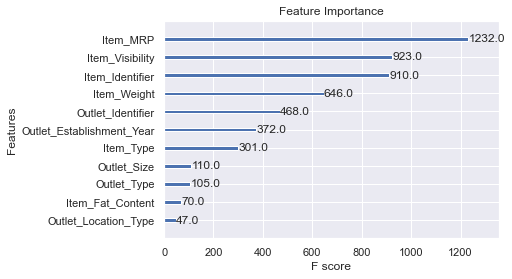

In [50]:
from xgboost import plot_importance

# Plot feature importance
plt.figure(figsize=(12, 12))
plot_importance(model)
plt.title('Feature Importance')
plt.show()

# Evaluation

In [51]:
# prediction on training data
training_data_prediction = model.predict(X_train)

In [52]:
# R squared Value
r2_train = metrics.r2_score(Y_train, training_data_prediction)

In [53]:
print('R Squared value = ', r2_train)

R Squared value =  0.8762174618111388


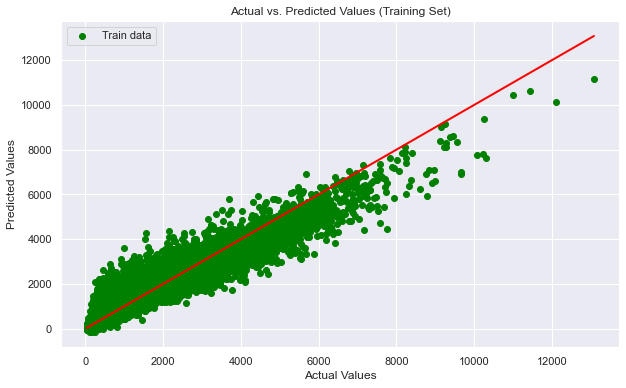

In [54]:
#Plot for Training Data

plt.figure(figsize=(10, 6))
plt.scatter(Y_train, training_data_prediction, color='green', label='Train data')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (Training Set)')
plt.plot([Y_train.min(), Y_train.max()], [Y_train.min(), Y_train.max()], color='red', lw=2)
plt.legend()
plt.show()

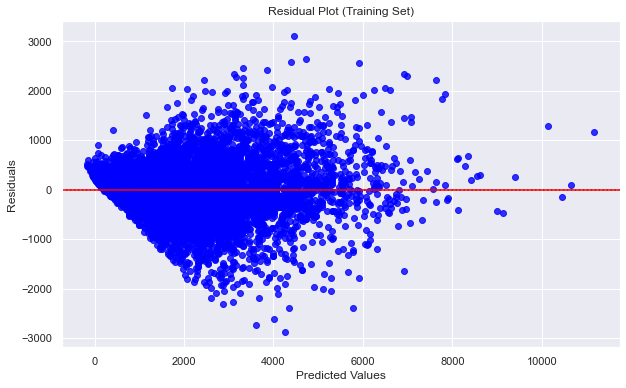

In [55]:
# Residual plot for training data
plt.figure(figsize=(10, 6))
sns.residplot(x=training_data_prediction, y=Y_train - training_data_prediction , color='blue')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot (Training Set)')
plt.axhline(0, color='red')
plt.show()

In [56]:
# prediction on test data
test_data_prediction = model.predict(X_test)

In [57]:
# R squared Value
r2_test = metrics.r2_score(Y_test, test_data_prediction)

In [58]:
print('R Squared value = ', r2_test)

R Squared value =  0.5017253991620692


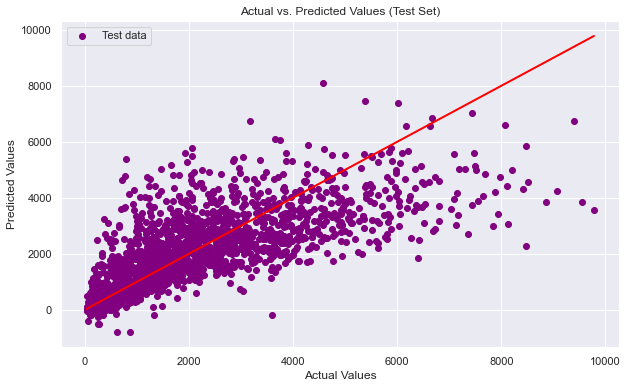

In [59]:
# Plot for test data
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, test_data_prediction, color='purple', label='Test data')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (Test Set)')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color='red', lw=2)
plt.legend()
plt.show()

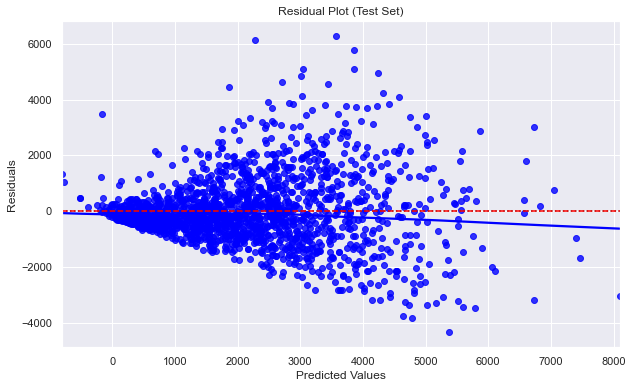

In [60]:
# Residual plot for test data
plt.figure(figsize=(10, 6))
sns.residplot(x=test_data_prediction, y=Y_test - test_data_prediction, lowess=True, color='Blue')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot (Test Set)')
plt.axhline(0, color='red', linestyle='--')
plt.show()


# Building a Predictive System

In [ ]:
# If Item_Identifier is not essential, consider excluding it from encoding
input_data = pd.DataFrame([{
    'Item_Identifier': 'FDA15',  # This might be excluded from encoding
    'Item_Weight': 9.3,
    'Item_Fat_Content': 'Low Fat',
    'Item_Visibility': 0.016047301,
    'Item_Type': 'Dairy',
    'Item_MRP': 249.8092,
    'Outlet_Identifier': 'OUT049',
    'Outlet_Establishment_Year': 1999,
    'Outlet_Size': 'Medium',
    'Outlet_Location_Type': 'Tier 1',
    'Outlet_Type': 'Supermarket Type1'
}])

# Handle missing values
input_data['Item_Weight'].fillna(market['Item_Weight'].mean(), inplace=True)
input_data['Outlet_Size'] = input_data['Outlet_Size'].fillna(
    input_data.groupby('Outlet_Type')['Outlet_Size'].transform(lambda x: x.mode()[0]))

# Encode categorical features
categorical_features = [
    'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 
    'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'
]

for feature in categorical_features:
    input_data[feature] = encoder.transform(input_data[feature])

# Ensure feature columns are in the same order as the training data
input_data = input_data[X.columns]

# Make the prediction
prediction = model.predict(input_data)

# Print the prediction
print(prediction)
